In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
df = pd.read_pickle('data/micro_sud3_normalized.pkl')
df = df.reset_index()


def split_dataframe(dataframe, percent):
    nb_rows = int(np.floor(percent * len(dataframe)))
    return dataframe[:nb_rows], dataframe[nb_rows:]

def dataframe_to_xy(df):
    return (np.array(df[['NO2_61FD', 'NO2_61F0', 'NO2_61EF', 'temp', 'rh',\
                         'tgrad', 'pressure', 'pluvio']]),\
            np.array(df['NO2_ref']))

        
df_train, df_test = split_dataframe(df, 0.5) 
df_valid, df_test = split_dataframe(df_test, 0.5)

X_train, y_train = dataframe_to_xy(df_train)
X_valid, y_valid = dataframe_to_xy(df_valid)
X_test, y_test = dataframe_to_xy(df_test)

X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_valid= X_valid.reshape((X_valid.shape[0], 1,  X_valid.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

def dataframe_to_xy_sequences(df, sequence_size):
    out_X = np.zeros((len(df)//sequence_size, sequence_size, 8))
    out_y = np.zeros((len(df)//sequence_size, sequence_size))
    i = 0
    while i + sequence_size < len(df):
        sequence = df.iloc[i:i+sequence_size]
        out_X[i//sequence_size] =  np.array(sequence[['NO2_61FD', 'NO2_61F0', 'NO2_61EF', 'temp', 'rh',\
                                 'tgrad', 'pressure', 'pluvio']])
        out_y[i//sequence_size] = np.array(sequence['NO2_ref'])
        i += sequence_size
        
    return out_X, out_y

In [3]:
from keras.layers import SimpleRNN, Dense, LSTM, GRU
from keras.models import Sequential
from keras.callbacks import EarlyStopping

def simple_rnn_model(nb_units, input_dim, loss='mean_squared_error', optimizer='adam'):
    model = Sequential()
    model.add(SimpleRNN(nb_units, input_shape=input_dim, activation='relu'))#input_dim=input_dim[1], input_length=input_dim[0], return_sequences=True))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss=loss, optimizer=optimizer)
    model.summary()
    return model

def lstm_model(nb_units, input_dim, loss='mean_squared_error', optimizer='adam'):
    model = Sequential()
    model.add(LSTM(nb_units, input_shape=input_dim, activation='relu'))#input_dim=input_dim[1], input_length=input_dim[0], return_sequences=True))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss=loss, optimizer=optimizer)
    model.summary()
    return model

def gru_model(nb_units, input_dim, loss='mean_squared_error', optimizer='adam'):
    model = Sequential()
    model.add(GRU(nb_units, input_shape=input_dim, activation='relu'))#input_dim=input_dim[1], input_length=input_dim[0], return_sequences=True))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss=loss, optimizer=optimizer)
    model.summary()
    return model

Using TensorFlow backend.


In [4]:
print(X_train.shape)
model = simple_rnn_model(32, X_train.shape[1:])

(1126, 1, 8)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 32)                1312      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 1,345
Trainable params: 1,345
Non-trainable params: 0
_________________________________________________________________


In [5]:
early_stopping = EarlyStopping(monitor='val_loss', verbose=1, mode='auto', patience=10)
history = model.fit(X_train, y_train, batch_size=32, epochs=10000, validation_data=(X_valid, y_valid), callbacks=[early_stopping], verbose=1, shuffle=False)

Train on 1126 samples, validate on 563 samples
Epoch 1/10000
1126/1126 [==============================] - 1s - loss: 3338.7269 - val_loss: 2988.5734
Epoch 2/10000
1126/1126 [==============================] - 0s - loss: 3310.0022 - val_loss: 2955.9246
Epoch 3/10000
1126/1126 [==============================] - 0s - loss: 3272.7424 - val_loss: 2911.4492
Epoch 4/10000
1126/1126 [==============================] - 0s - loss: 3217.8316 - val_loss: 2849.0086
Epoch 5/10000
1126/1126 [==============================] - 0s - loss: 3139.9851 - val_loss: 2764.9304
Epoch 6/10000
1126/1126 [==============================] - 0s - loss: 3036.9269 - val_loss: 2659.1266
Epoch 7/10000
1126/1126 [==============================] - 0s - loss: 2908.6243 - val_loss: 2534.0007
Epoch 8/10000
1126/1126 [==============================] - 0s - loss: 2757.1496 - val_loss: 2392.8800
Epoch 9/10000
1126/1126 [==============================] - 0s - loss: 2587.1464 - val_loss: 2240.3704
Epoch 10/10000
1126/1126 [=========

1126/1126 [==============================] - 0s - loss: 142.6025 - val_loss: 174.0599
Epoch 82/10000
1126/1126 [==============================] - 0s - loss: 141.5129 - val_loss: 172.6280
Epoch 83/10000
1126/1126 [==============================] - 0s - loss: 140.4536 - val_loss: 171.2344
Epoch 84/10000
1126/1126 [==============================] - 0s - loss: 139.4184 - val_loss: 169.8720
Epoch 85/10000
1126/1126 [==============================] - 0s - loss: 138.4112 - val_loss: 168.5366
Epoch 86/10000
1126/1126 [==============================] - 0s - loss: 137.4324 - val_loss: 167.2163
Epoch 87/10000
1126/1126 [==============================] - 0s - loss: 136.4818 - val_loss: 165.9365
Epoch 88/10000
1126/1126 [==============================] - 0s - loss: 135.5573 - val_loss: 164.6943
Epoch 89/10000
1126/1126 [==============================] - 0s - loss: 134.6596 - val_loss: 163.4781
Epoch 90/10000
1126/1126 [==============================] - 0s - loss: 133.7876 - val_loss: 162.2969
Epoch

1126/1126 [==============================] - 0s - loss: 111.6595 - val_loss: 133.5667
Epoch 162/10000
1126/1126 [==============================] - ETA: 0s - loss: 112.214 - 0s - loss: 111.5911 - val_loss: 133.4696
Epoch 163/10000
1126/1126 [==============================] - 0s - loss: 111.5242 - val_loss: 133.3764
Epoch 164/10000
1126/1126 [==============================] - 0s - loss: 111.4561 - val_loss: 133.2826
Epoch 165/10000
1126/1126 [==============================] - 0s - loss: 111.3899 - val_loss: 133.1848
Epoch 166/10000
1126/1126 [==============================] - 0s - loss: 111.3249 - val_loss: 133.0836
Epoch 167/10000
1126/1126 [==============================] - 0s - loss: 111.2614 - val_loss: 132.9928
Epoch 168/10000
1126/1126 [==============================] - 0s - loss: 111.1987 - val_loss: 132.9035
Epoch 169/10000
1126/1126 [==============================] - 0s - loss: 111.1384 - val_loss: 132.8074
Epoch 170/10000
1126/1126 [==============================] - 0s - loss: 

1126/1126 [==============================] - 0s - loss: 108.2803 - val_loss: 125.3725
Epoch 242/10000
1126/1126 [==============================] - 0s - loss: 108.2501 - val_loss: 125.3047
Epoch 243/10000
1126/1126 [==============================] - 0s - loss: 108.2206 - val_loss: 125.2383
Epoch 244/10000
1126/1126 [==============================] - 0s - loss: 108.1928 - val_loss: 125.1667
Epoch 245/10000
1126/1126 [==============================] - 0s - loss: 108.1642 - val_loss: 125.0960
Epoch 246/10000
1126/1126 [==============================] - 0s - loss: 108.1359 - val_loss: 125.0268
Epoch 247/10000
1126/1126 [==============================] - 0s - loss: 108.1080 - val_loss: 124.9586
Epoch 248/10000
1126/1126 [==============================] - 0s - loss: 108.0796 - val_loss: 124.8953
Epoch 249/10000
1126/1126 [==============================] - 0s - loss: 108.0491 - val_loss: 124.8214
Epoch 250/10000
1126/1126 [==============================] - 0s - loss: 108.0209 - val_loss: 124.7

1126/1126 [==============================] - 0s - loss: 106.0903 - val_loss: 120.9500
Epoch 322/10000
1126/1126 [==============================] - 0s - loss: 106.0648 - val_loss: 120.9084
Epoch 323/10000
1126/1126 [==============================] - 0s - loss: 106.0390 - val_loss: 120.8681
Epoch 324/10000
1126/1126 [==============================] - 0s - loss: 106.0142 - val_loss: 120.8260
Epoch 325/10000
1126/1126 [==============================] - 0s - loss: 105.9885 - val_loss: 120.7844
Epoch 326/10000
1126/1126 [==============================] - 0s - loss: 105.9634 - val_loss: 120.7393
Epoch 327/10000
1126/1126 [==============================] - 0s - loss: 105.9381 - val_loss: 120.6944
Epoch 328/10000
1126/1126 [==============================] - 0s - loss: 105.9143 - val_loss: 120.6498
Epoch 329/10000
1126/1126 [==============================] - 0s - loss: 105.8885 - val_loss: 120.6069
Epoch 330/10000
1126/1126 [==============================] - 0s - loss: 105.8632 - val_loss: 120.5

1126/1126 [==============================] - 0s - loss: 104.5980 - val_loss: 118.7986
Epoch 402/10000
1126/1126 [==============================] - 0s - loss: 104.5842 - val_loss: 118.7912
Epoch 403/10000
1126/1126 [==============================] - 0s - loss: 104.5706 - val_loss: 118.7893
Epoch 404/10000
1126/1126 [==============================] - 0s - loss: 104.5567 - val_loss: 118.7824
Epoch 405/10000
1126/1126 [==============================] - 0s - loss: 104.5431 - val_loss: 118.7786
Epoch 406/10000
1126/1126 [==============================] - 0s - loss: 104.5310 - val_loss: 118.7725
Epoch 407/10000
1126/1126 [==============================] - 0s - loss: 104.5170 - val_loss: 118.7682
Epoch 408/10000
1126/1126 [==============================] - 0s - loss: 104.5034 - val_loss: 118.7653
Epoch 409/10000
1126/1126 [==============================] - 0s - loss: 104.4907 - val_loss: 118.7595
Epoch 410/10000
1126/1126 [==============================] - 0s - loss: 104.4779 - val_loss: 118.7

1126/1126 [==============================] - 0s - loss: 103.7113 - val_loss: 118.3576
Epoch 482/10000
1126/1126 [==============================] - 0s - loss: 103.7035 - val_loss: 118.3537
Epoch 483/10000
1126/1126 [==============================] - 0s - loss: 103.6949 - val_loss: 118.3494
Epoch 484/10000
1126/1126 [==============================] - 0s - loss: 103.6866 - val_loss: 118.3422
Epoch 485/10000
1126/1126 [==============================] - 0s - loss: 103.6773 - val_loss: 118.3383
Epoch 486/10000
1126/1126 [==============================] - 0s - loss: 103.6703 - val_loss: 118.3339
Epoch 487/10000
1126/1126 [==============================] - 0s - loss: 103.6615 - val_loss: 118.3280
Epoch 488/10000
1126/1126 [==============================] - 0s - loss: 103.6522 - val_loss: 118.3223
Epoch 489/10000
1126/1126 [==============================] - 0s - loss: 103.6450 - val_loss: 118.3190
Epoch 490/10000
1126/1126 [==============================] - 0s - loss: 103.6363 - val_loss: 118.3

1126/1126 [==============================] - 0s - loss: 103.1492 - val_loss: 118.1355
Epoch 562/10000
1126/1126 [==============================] - 0s - loss: 103.1426 - val_loss: 118.1322
Epoch 563/10000
1126/1126 [==============================] - 0s - loss: 103.1376 - val_loss: 118.1275
Epoch 564/10000
1126/1126 [==============================] - 0s - loss: 103.1301 - val_loss: 118.1243
Epoch 565/10000
1126/1126 [==============================] - 0s - loss: 103.1252 - val_loss: 118.1198
Epoch 566/10000
1126/1126 [==============================] - 0s - loss: 103.1191 - val_loss: 118.1169
Epoch 567/10000
1126/1126 [==============================] - 0s - loss: 103.1130 - val_loss: 118.1118
Epoch 568/10000
1126/1126 [==============================] - 0s - loss: 103.1067 - val_loss: 118.1086
Epoch 569/10000
1126/1126 [==============================] - 0s - loss: 103.1005 - val_loss: 118.1075
Epoch 570/10000
1126/1126 [==============================] - 0s - loss: 103.0930 - val_loss: 118.1

1126/1126 [==============================] - 0s - loss: 102.6162 - val_loss: 117.8953
Epoch 642/10000
1126/1126 [==============================] - 0s - loss: 102.6095 - val_loss: 117.8940
Epoch 643/10000
1126/1126 [==============================] - 0s - loss: 102.6027 - val_loss: 117.8909
Epoch 644/10000
1126/1126 [==============================] - 0s - loss: 102.5958 - val_loss: 117.8900
Epoch 645/10000
1126/1126 [==============================] - 0s - loss: 102.5867 - val_loss: 117.8839
Epoch 646/10000
1126/1126 [==============================] - 0s - loss: 102.5792 - val_loss: 117.8766
Epoch 647/10000
1126/1126 [==============================] - 0s - loss: 102.5713 - val_loss: 117.8733
Epoch 648/10000
1126/1126 [==============================] - 0s - loss: 102.5627 - val_loss: 117.8648
Epoch 649/10000
1126/1126 [==============================] - 0s - loss: 102.5547 - val_loss: 117.8581
Epoch 650/10000
1126/1126 [==============================] - 0s - loss: 102.5458 - val_loss: 117.8

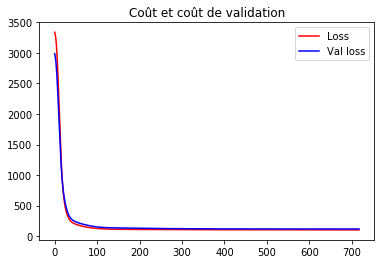

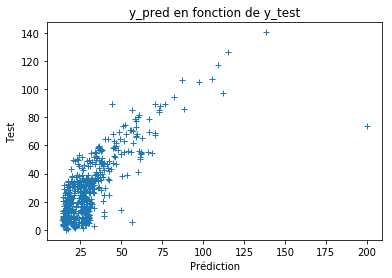

In [6]:
y_pred = model.predict(X_test)
plt.title('Coût et coût de validation')
line1,=plt.plot(history.history['loss'], label="Loss", linestyle='-', color='r')
line2,=plt.plot(history.history['val_loss'], label="Val loss", linestyle='-', color='b')
first_legend = plt.legend(handles=[line1, line2], loc=1)

plt.show()

plt.title('y_pred en fonction de y_test')

plt.plot(y_pred[:], y_test[:], '+')
plt.ylabel('Test')
plt.xlabel('Prédiction')
plt.show()

In [7]:
model = lstm_model(32, X_train.shape[1:])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 32)                5248      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 5,281
Trainable params: 5,281
Non-trainable params: 0
_________________________________________________________________


In [8]:
early_stopping = EarlyStopping(monitor='val_loss', verbose=1, mode='auto', patience=10)
history = model.fit(X_train, y_train, batch_size=32, epochs=10000, validation_data=(X_valid, y_valid), callbacks=[early_stopping], verbose=1, shuffle=False)

Train on 1126 samples, validate on 563 samples
Epoch 1/10000
1126/1126 [==============================] - 1s - loss: 3347.1395 - val_loss: 3007.1302
Epoch 2/10000
1126/1126 [==============================] - 0s - loss: 3336.0125 - val_loss: 2995.4703
Epoch 3/10000
1126/1126 [==============================] - 0s - loss: 3318.5164 - val_loss: 2975.9344
Epoch 4/10000
1126/1126 [==============================] - 0s - loss: 3288.8466 - val_loss: 2943.0173
Epoch 5/10000
1126/1126 [==============================] - 0s - loss: 3240.5420 - val_loss: 2890.9079
Epoch 6/10000
1126/1126 [==============================] - 0s - loss: 3167.3329 - val_loss: 2815.3084
Epoch 7/10000
1126/1126 [==============================] - 0s - loss: 3065.5109 - val_loss: 2715.3289
Epoch 8/10000
1126/1126 [==============================] - 0s - loss: 2935.7506 - val_loss: 2593.7298
Epoch 9/10000
1126/1126 [==============================] - 0s - loss: 2781.0850 - val_loss: 2450.8504
Epoch 10/10000
1126/1126 [=========

1126/1126 [==============================] - 0s - loss: 134.7675 - val_loss: 218.7598
Epoch 82/10000
1126/1126 [==============================] - 0s - loss: 133.1924 - val_loss: 216.5726
Epoch 83/10000
1126/1126 [==============================] - 0s - loss: 131.6962 - val_loss: 214.4362
Epoch 84/10000
1126/1126 [==============================] - 0s - loss: 130.2746 - val_loss: 212.3576
Epoch 85/10000
1126/1126 [==============================] - 0s - loss: 128.9205 - val_loss: 210.3207
Epoch 86/10000
1126/1126 [==============================] - 0s - loss: 127.6274 - val_loss: 208.3286
Epoch 87/10000
1126/1126 [==============================] - 0s - loss: 126.3898 - val_loss: 206.3752
Epoch 88/10000
1126/1126 [==============================] - 0s - loss: 125.2051 - val_loss: 204.4637
Epoch 89/10000
1126/1126 [==============================] - 0s - loss: 124.0708 - val_loss: 202.5895
Epoch 90/10000
1126/1126 [==============================] - 0s - loss: 122.9865 - val_loss: 200.7888
Epoch

1126/1126 [==============================] - 0s - loss: 85.7643 - val_loss: 121.3537
Epoch 162/10000
1126/1126 [==============================] - 0s - loss: 85.4470 - val_loss: 120.7126
Epoch 163/10000
1126/1126 [==============================] - 0s - loss: 85.1309 - val_loss: 120.0818
Epoch 164/10000
1126/1126 [==============================] - 0s - loss: 84.8207 - val_loss: 119.4617
Epoch 165/10000
1126/1126 [==============================] - 0s - loss: 84.5155 - val_loss: 118.8466
Epoch 166/10000
1126/1126 [==============================] - 0s - loss: 84.2120 - val_loss: 118.2360
Epoch 167/10000
1126/1126 [==============================] - 0s - loss: 83.9111 - val_loss: 117.6392
Epoch 168/10000
1126/1126 [==============================] - 0s - loss: 83.6149 - val_loss: 117.0658
Epoch 169/10000
1126/1126 [==============================] - 0s - loss: 83.3214 - val_loss: 116.4965
Epoch 170/10000
1126/1126 [==============================] - 0s - loss: 83.0321 - val_loss: 115.9290
Epoch 

1126/1126 [==============================] - 0s - loss: 67.8650 - val_loss: 91.4505
Epoch 243/10000
1126/1126 [==============================] - 0s - loss: 67.7120 - val_loss: 91.2670
Epoch 244/10000
1126/1126 [==============================] - 0s - loss: 67.5564 - val_loss: 91.0859
Epoch 245/10000
1126/1126 [==============================] - 0s - loss: 67.4043 - val_loss: 90.9076
Epoch 246/10000
1126/1126 [==============================] - 0s - loss: 67.2518 - val_loss: 90.7305
Epoch 247/10000
1126/1126 [==============================] - 0s - loss: 67.0998 - val_loss: 90.5524
Epoch 248/10000
1126/1126 [==============================] - 0s - loss: 66.9536 - val_loss: 90.3735
Epoch 249/10000
1126/1126 [==============================] - 0s - loss: 66.8019 - val_loss: 90.2033
Epoch 250/10000
1126/1126 [==============================] - 0s - loss: 66.6525 - val_loss: 90.0349
Epoch 251/10000
1126/1126 [==============================] - 0s - loss: 66.5089 - val_loss: 89.8704
Epoch 252/10000


1126/1126 [==============================] - 0s - loss: 57.9466 - val_loss: 81.6060
Epoch 325/10000
1126/1126 [==============================] - 0s - loss: 57.8551 - val_loss: 81.5363
Epoch 326/10000
1126/1126 [==============================] - 0s - loss: 57.7683 - val_loss: 81.4617
Epoch 327/10000
1126/1126 [==============================] - 0s - loss: 57.6736 - val_loss: 81.4051
Epoch 328/10000
1126/1126 [==============================] - 0s - loss: 57.5891 - val_loss: 81.3056
Epoch 329/10000
1126/1126 [==============================] - 0s - loss: 57.4980 - val_loss: 81.2707
Epoch 330/10000
1126/1126 [==============================] - 0s - loss: 57.4120 - val_loss: 81.1690
Epoch 331/10000
1126/1126 [==============================] - 0s - loss: 57.3207 - val_loss: 81.1279
Epoch 332/10000
1126/1126 [==============================] - 0s - loss: 57.2377 - val_loss: 81.0313
Epoch 333/10000
1126/1126 [==============================] - 0s - loss: 57.1491 - val_loss: 80.9925
Epoch 334/10000


1126/1126 [==============================] - 0s - loss: 52.2102 - val_loss: 78.5570
Epoch 407/10000
1126/1126 [==============================] - 0s - loss: 52.1594 - val_loss: 78.5530
Epoch 408/10000
1126/1126 [==============================] - 0s - loss: 52.1079 - val_loss: 78.5345
Epoch 409/10000
1126/1126 [==============================] - 0s - loss: 52.0540 - val_loss: 78.5171
Epoch 410/10000
1126/1126 [==============================] - 0s - loss: 52.0019 - val_loss: 78.5121
Epoch 411/10000
1126/1126 [==============================] - 0s - loss: 51.9513 - val_loss: 78.4961
Epoch 412/10000
1126/1126 [==============================] - 0s - loss: 51.8992 - val_loss: 78.4866
Epoch 413/10000
1126/1126 [==============================] - 0s - loss: 51.8481 - val_loss: 78.4801
Epoch 414/10000
1126/1126 [==============================] - 0s - loss: 51.7991 - val_loss: 78.4691
Epoch 415/10000
1126/1126 [==============================] - 0s - loss: 51.7449 - val_loss: 78.4606
Epoch 416/10000


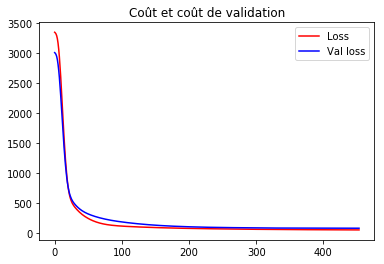

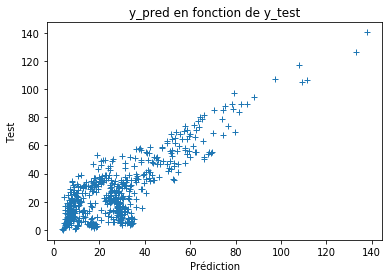

In [9]:
y_pred = model.predict(X_test)
plt.title('Coût et coût de validation')
line1,=plt.plot(history.history['loss'], label="Loss", linestyle='-', color='r')
line2,=plt.plot(history.history['val_loss'], label="Val loss", linestyle='-', color='b')
first_legend = plt.legend(handles=[line1, line2], loc=1)

plt.show()

plt.title('y_pred en fonction de y_test')

plt.plot(y_pred[:], y_test[:], '+')
plt.ylabel('Test')
plt.xlabel('Prédiction')
plt.show()

In [10]:
model = gru_model(32, X_train.shape[1:])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 32)                3936      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 3,969
Trainable params: 3,969
Non-trainable params: 0
_________________________________________________________________


In [11]:
early_stopping = EarlyStopping(monitor='val_loss', verbose=1, mode='auto', patience=10)
history = model.fit(X_train, y_train, batch_size=32, epochs=10000, validation_data=(X_valid, y_valid), callbacks=[early_stopping], verbose=1, shuffle=False)

Train on 1126 samples, validate on 563 samples
Epoch 1/10000
1126/1126 [==============================] - 1s - loss: 3346.6046 - val_loss: 3005.5630
Epoch 2/10000
1126/1126 [==============================] - 0s - loss: 3333.4573 - val_loss: 2992.2437
Epoch 3/10000
1126/1126 [==============================] - 0s - loss: 3315.0757 - val_loss: 2972.0245
Epoch 4/10000
1126/1126 [==============================] - 0s - loss: 3286.3358 - val_loss: 2940.6584
Epoch 5/10000
1126/1126 [==============================] - 0s - loss: 3242.2003 - val_loss: 2893.5140
Epoch 6/10000
1126/1126 [==============================] - 0s - loss: 3176.8351 - val_loss: 2825.5253
Epoch 7/10000
1126/1126 [==============================] - 0s - loss: 3085.3462 - val_loss: 2734.1705
Epoch 8/10000
1126/1126 [==============================] - 0s - loss: 2966.1781 - val_loss: 2619.2635
Epoch 9/10000
1126/1126 [==============================] - 0s - loss: 2820.3063 - val_loss: 2481.5536
Epoch 10/10000
1126/1126 [=========

1126/1126 [==============================] - 0s - loss: 127.3661 - val_loss: 198.5776
Epoch 82/10000
1126/1126 [==============================] - 0s - loss: 126.2255 - val_loss: 196.6425
Epoch 83/10000
1126/1126 [==============================] - 0s - loss: 125.1315 - val_loss: 194.7311
Epoch 84/10000
1126/1126 [==============================] - 0s - loss: 124.0790 - val_loss: 192.8481
Epoch 85/10000
1126/1126 [==============================] - 0s - loss: 123.0663 - val_loss: 190.9969
Epoch 86/10000
1126/1126 [==============================] - 0s - loss: 122.0975 - val_loss: 189.1722
Epoch 87/10000
1126/1126 [==============================] - 0s - loss: 121.1692 - val_loss: 187.3798
Epoch 88/10000
1126/1126 [==============================] - 0s - loss: 120.2793 - val_loss: 185.6113
Epoch 89/10000
1126/1126 [==============================] - 0s - loss: 119.4233 - val_loss: 183.8726
Epoch 90/10000
1126/1126 [==============================] - 0s - loss: 118.6006 - val_loss: 182.1623
Epoch

1126/1126 [==============================] - 0s - loss: 87.5667 - val_loss: 115.8297
Epoch 163/10000
1126/1126 [==============================] - 0s - loss: 87.2998 - val_loss: 115.4136
Epoch 164/10000
1126/1126 [==============================] - 0s - loss: 87.0365 - val_loss: 115.0285
Epoch 165/10000
1126/1126 [==============================] - 0s - loss: 86.7756 - val_loss: 114.6319
Epoch 166/10000
1126/1126 [==============================] - 0s - loss: 86.5164 - val_loss: 114.2528
Epoch 167/10000
1126/1126 [==============================] - 0s - loss: 86.2585 - val_loss: 113.8953
Epoch 168/10000
1126/1126 [==============================] - 0s - loss: 86.0027 - val_loss: 113.5256
Epoch 169/10000
1126/1126 [==============================] - 0s - loss: 85.7494 - val_loss: 113.1653
Epoch 170/10000
1126/1126 [==============================] - 0s - loss: 85.4979 - val_loss: 112.8321
Epoch 171/10000
1126/1126 [==============================] - 0s - loss: 85.2481 - val_loss: 112.5218
Epoch 

1126/1126 [==============================] - 0s - loss: 70.9477 - val_loss: 96.7498
Epoch 244/10000
1126/1126 [==============================] - 0s - loss: 70.7922 - val_loss: 96.6384
Epoch 245/10000
1126/1126 [==============================] - 0s - loss: 70.6390 - val_loss: 96.4028
Epoch 246/10000
1126/1126 [==============================] - 0s - loss: 70.4860 - val_loss: 96.3005
Epoch 247/10000
1126/1126 [==============================] - 0s - loss: 70.3346 - val_loss: 96.1081
Epoch 248/10000
1126/1126 [==============================] - 0s - loss: 70.1789 - val_loss: 95.9426
Epoch 249/10000
1126/1126 [==============================] - 0s - loss: 70.0328 - val_loss: 95.8295
Epoch 250/10000
1126/1126 [==============================] - 0s - loss: 69.8815 - val_loss: 95.6497
Epoch 251/10000
1126/1126 [==============================] - 0s - loss: 69.7297 - val_loss: 95.4395
Epoch 252/10000
1126/1126 [==============================] - 0s - loss: 69.5834 - val_loss: 95.3052
Epoch 253/10000


1126/1126 [==============================] - 0s - loss: 61.0593 - val_loss: 83.9336
Epoch 326/10000
1126/1126 [==============================] - 0s - loss: 60.9675 - val_loss: 83.8219
Epoch 327/10000
1126/1126 [==============================] - 0s - loss: 60.8749 - val_loss: 83.7082
Epoch 328/10000
1126/1126 [==============================] - 0s - loss: 60.7845 - val_loss: 83.5885
Epoch 329/10000
1126/1126 [==============================] - 0s - loss: 60.6962 - val_loss: 83.4897
Epoch 330/10000
1126/1126 [==============================] - 0s - loss: 60.6079 - val_loss: 83.3806
Epoch 331/10000
1126/1126 [==============================] - 0s - loss: 60.5182 - val_loss: 83.2715
Epoch 332/10000
1126/1126 [==============================] - 0s - loss: 60.4336 - val_loss: 83.1610
Epoch 333/10000
1126/1126 [==============================] - 0s - loss: 60.3415 - val_loss: 83.0582
Epoch 334/10000
1126/1126 [==============================] - 0s - loss: 60.2576 - val_loss: 82.9289
Epoch 335/10000


1126/1126 [==============================] - 0s - loss: 55.1564 - val_loss: 77.2195
Epoch 408/10000
1126/1126 [==============================] - 0s - loss: 55.1051 - val_loss: 77.1669
Epoch 409/10000
1126/1126 [==============================] - 0s - loss: 55.0465 - val_loss: 77.1183
Epoch 410/10000
1126/1126 [==============================] - 0s - loss: 54.9924 - val_loss: 77.0927
Epoch 411/10000
1126/1126 [==============================] - 0s - loss: 54.9364 - val_loss: 77.0476
Epoch 412/10000
1126/1126 [==============================] - 0s - loss: 54.8790 - val_loss: 77.0326
Epoch 413/10000
1126/1126 [==============================] - 0s - loss: 54.8278 - val_loss: 76.9876
Epoch 414/10000
1126/1126 [==============================] - 0s - loss: 54.7694 - val_loss: 76.9491
Epoch 415/10000
1126/1126 [==============================] - 0s - loss: 54.7147 - val_loss: 76.9213
Epoch 416/10000
1126/1126 [==============================] - 0s - loss: 54.6578 - val_loss: 76.9238
Epoch 417/10000


1126/1126 [==============================] - 0s - loss: 51.0849 - val_loss: 75.9213
Epoch 489/10000
1126/1126 [==============================] - 0s - loss: 51.0454 - val_loss: 75.8730
Epoch 490/10000
1126/1126 [==============================] - 0s - loss: 51.0005 - val_loss: 75.8963
Epoch 491/10000
1126/1126 [==============================] - 0s - loss: 50.9553 - val_loss: 75.8653
Epoch 492/10000
1126/1126 [==============================] - 0s - loss: 50.9165 - val_loss: 75.9190
Epoch 493/10000
1126/1126 [==============================] - 0s - loss: 50.8727 - val_loss: 75.9006
Epoch 494/10000
1126/1126 [==============================] - 0s - loss: 50.8323 - val_loss: 75.9210
Epoch 495/10000
1126/1126 [==============================] - 0s - loss: 50.7907 - val_loss: 75.9640
Epoch 496/10000
1126/1126 [==============================] - 0s - loss: 50.7480 - val_loss: 75.9243
Epoch 497/10000
1126/1126 [==============================] - 0s - loss: 50.7068 - val_loss: 75.9900
Epoch 498/10000


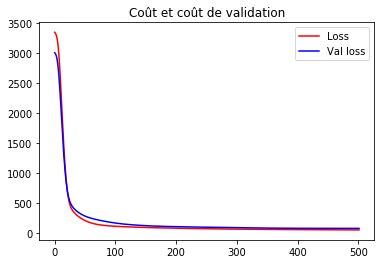

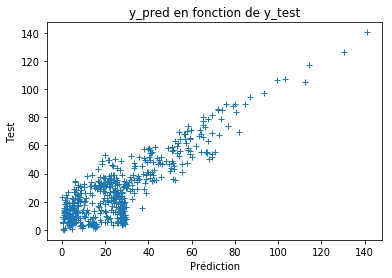

In [12]:
y_pred = model.predict(X_test)
plt.title('Coût et coût de validation')
line1,=plt.plot(history.history['loss'], label="Loss", linestyle='-', color='r')
line2,=plt.plot(history.history['val_loss'], label="Val loss", linestyle='-', color='b')
first_legend = plt.legend(handles=[line1, line2], loc=1)

plt.show()

plt.title('y_pred en fonction de y_test')

plt.plot(y_pred[:], y_test[:], '+')
plt.ylabel('Test')
plt.xlabel('Prédiction')
plt.show()